In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv

# https://github.com/vee-upatising/K-Means-Image-Segmentation/blob/master/Tray.ipynb

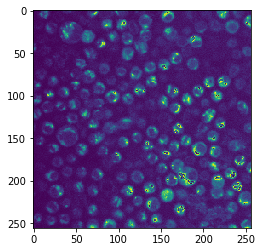

In [2]:
img = Image.open('/home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th0/Tcells_Th0_1n_photons.tiff')
# img = img.convert("RGB")
img = np.array(img).astype('uint8')
imshow(img)

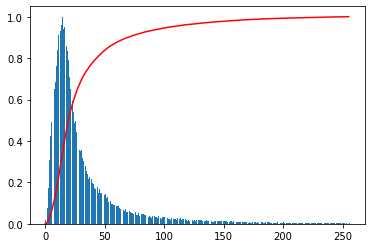

In [3]:
hist, bins = np.histogram(img, bins=256, range=[0,256])
cum_hist = np.cumsum(hist)

height, width = img.shape
norm_cum_hist = cum_hist / (height * width)
norm_hist = hist / hist.max()

#width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, norm_hist, align='center')
plt.plot(norm_cum_hist, color='r')
plt.show()

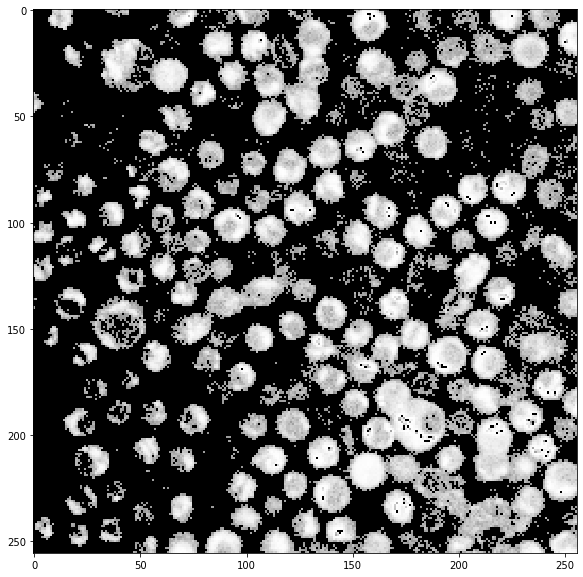

In [7]:
hists_cdf = (norm_cum_hist * 255).astype("uint8")

# mapping
img_eq = hists_cdf[img]
img_eq[img_eq<150] = 0
plt.figure(figsize=(10,10))
plt.imshow(img_eq, cmap='gray')

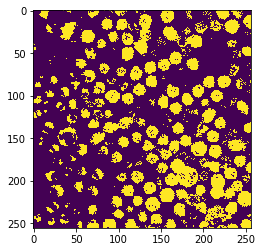

In [10]:
import skimage.filters as filters
thresh = filters.threshold_otsu(img)
image_binary = img > thresh-40
imshow(image_binary)

In [15]:

img = Image.fromarray(np.uint8(img_eq))

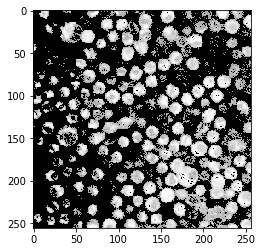

In [16]:
# img = Image.open('/home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th0/Tcells_Th0_1f_photons.tiff')
img = img.convert("RGB")
img = np.array(img).astype('uint8')
imshow(img)

In [18]:
z = np.dstack((img,rgb2hsv(img)))
z.shape

(256, 256, 6)

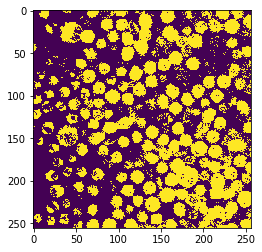

In [19]:
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=2)
james = kmeans.fit_predict(vectorized)
pic = james.reshape(256,256)
imshow(pic)

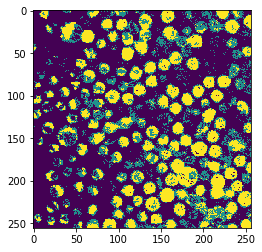

In [20]:
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=3)
james = kmeans.fit_predict(vectorized)
pic = james.reshape(256,256)
imshow(pic)

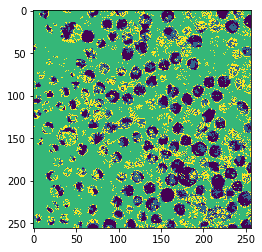

In [21]:
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=4)
james = kmeans.fit_predict(vectorized)
pic = james.reshape(256,256)
imshow(pic)